# Basic benchmarking visualization notebook
This notebook shows benchmarking results for different join algorithms. The benchmark was run on Spark in local mode, 4G for driver and executor memory and cut-off time of 30 minutes (jobs taking more than that were aborted). 

## Datasets used:

### all-to-all
Point intervals (from = to), the expected result is a full cartesian join per group.

### continous-16
Effectively one-to-16, database of point intervals and query spanning for 16 units, no intervals' overlapping.

### one-to-all
Database of point intervals and query consisting one interval covering whole database.

### one-to-one
Both database and query contain point intervals, expected 1:1 results.

### spanning-16
Database of point intervals and query intervals of length of 32 with sliding window ([1-33], [2-34], [3-35], ...). Query intervals do overlap.

### spanning-4
Similar to _spanning-16_, but with query interval length of 8.

### sparse-16
Similar to one-to-one, but query dataset is sparse and cotains only every 16th interval (1/16 of 1:1 dataset's intervals).


In [57]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [64]:
benchmark_results_directory = "data/benchmark-01"
benchmark_results_files = sorted([file for file in os.listdir(benchmark_results_directory) if not file.startswith('.')])

In [59]:
benchmark_results_dfs = [pd.read_csv(f"{benchmark_results_directory}/{file}", on_bad_lines="warn") for file in benchmark_results_files]
benchmark_results_df  = pd.concat(benchmark_results_dfs) 
benchmark_results_df.head()

,data_suite,clusters_count,rows_per_cluster,join_name,elapsed_time,result
0,all-to-all,16,100,broadcast-ailist-benchmark,928,success
1,all-to-all,16,250,broadcast-ailist-benchmark,171,success
2,all-to-all,16,500,broadcast-ailist-benchmark,125,success
3,all-to-all,16,1000,broadcast-ailist-benchmark,102,success
4,all-to-all,16,2500,broadcast-ailist-benchmark,118,success


In [60]:
def plot_dataset(dataset, data_suites = None, join_names = None):
    if data_suites is None:
        data_suites = dataset['data_suite'].unique()
        
    if join_names is None:
        join_names = dataset['join_name'].unique()
    
    dataset = dataset.query('result == "success"')
    plot_figure, plot_axes = plt.subplots(len(data_suites), 2, figsize=(16, 4 * len(data_suites)))

    plt.ticklabel_format(useOffset=False)

    for data_suite_index in range(len(data_suites)):
        data_suite = data_suites[data_suite_index]
        
        plot_left  = plot_axes[data_suite_index, 0]
        plot_right = plot_axes[data_suite_index, 1]

        plot_left.set_title(f'{data_suite} - lin')
        plot_right.set_title(f'{data_suite} - log')
    
        for join_name in join_names:
            df_to_plot = dataset.query(f'join_name == "{join_name}" and data_suite == "{data_suite}"')
            
            [dataset['join_name'] == join_name]
            plot_left.plot(df_to_plot['rows_per_cluster'], df_to_plot['elapsed_time'], label=join_name)
            plot_right.plot(df_to_plot['rows_per_cluster'], df_to_plot['elapsed_time'], label=join_name)
            
            plot_right.semilogx() 
            plot_right.legend(bbox_to_anchor=(1, 1.005))

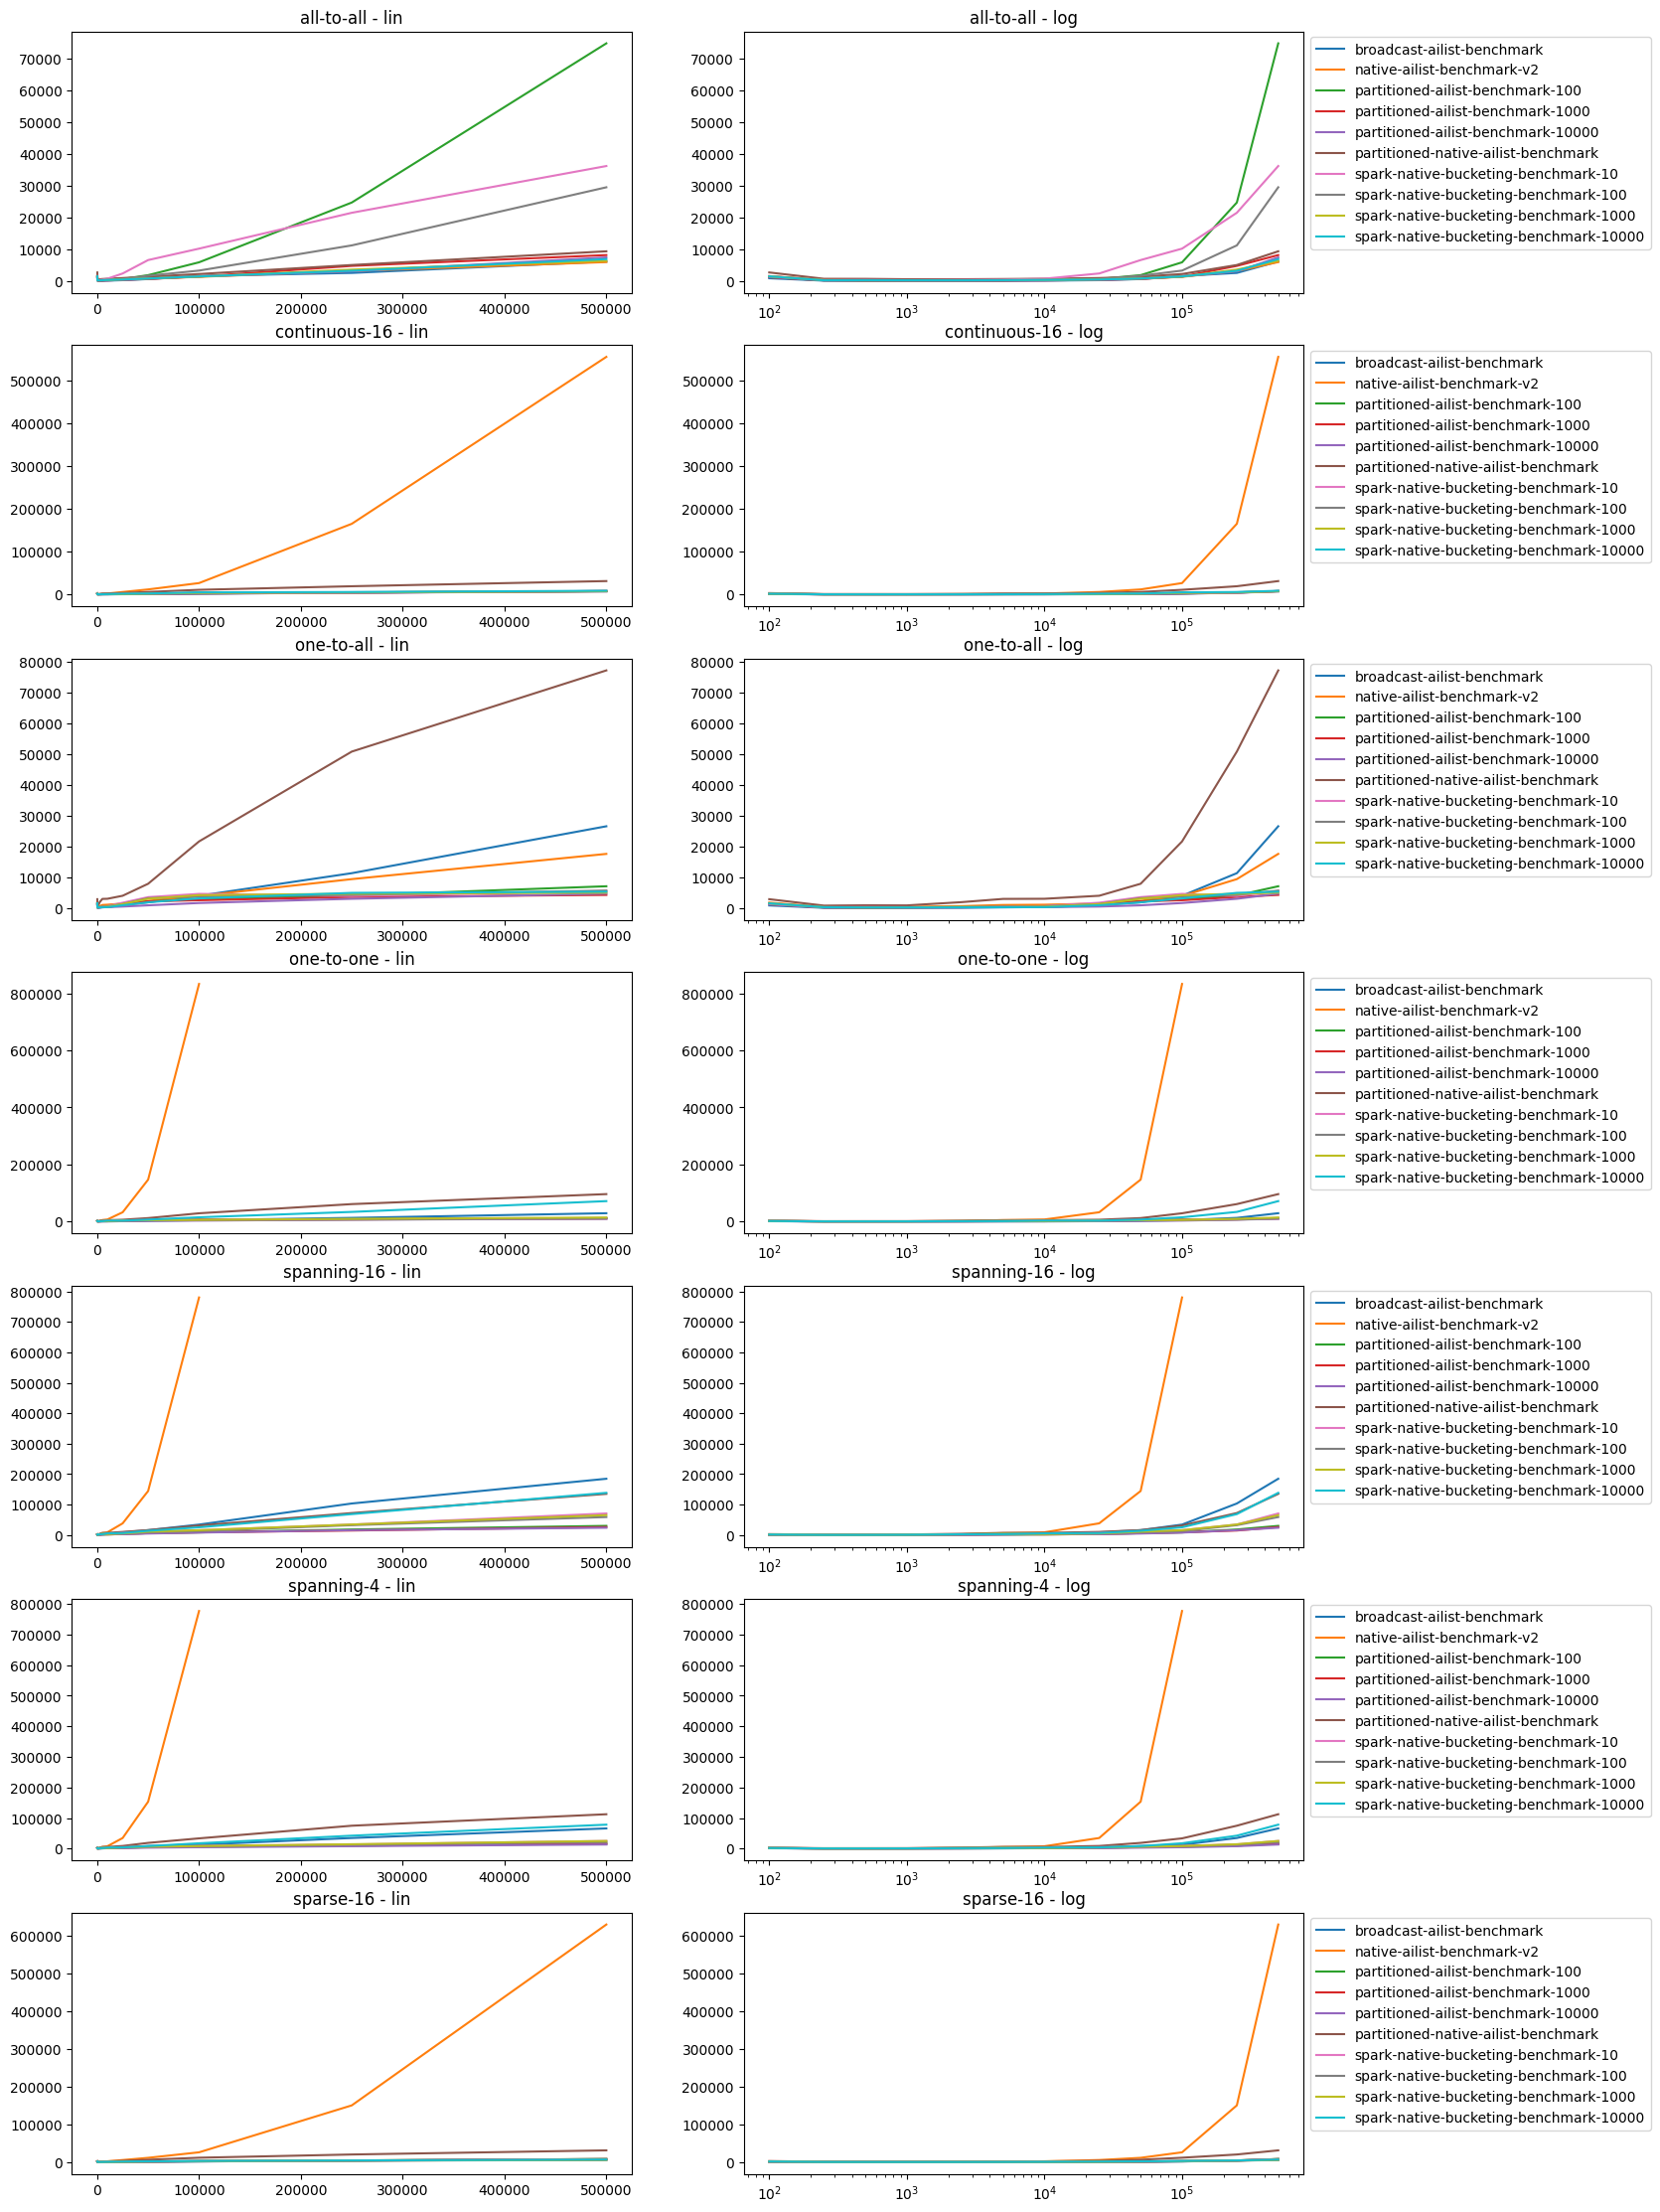

In [61]:
plot_dataset(benchmark_results_df)

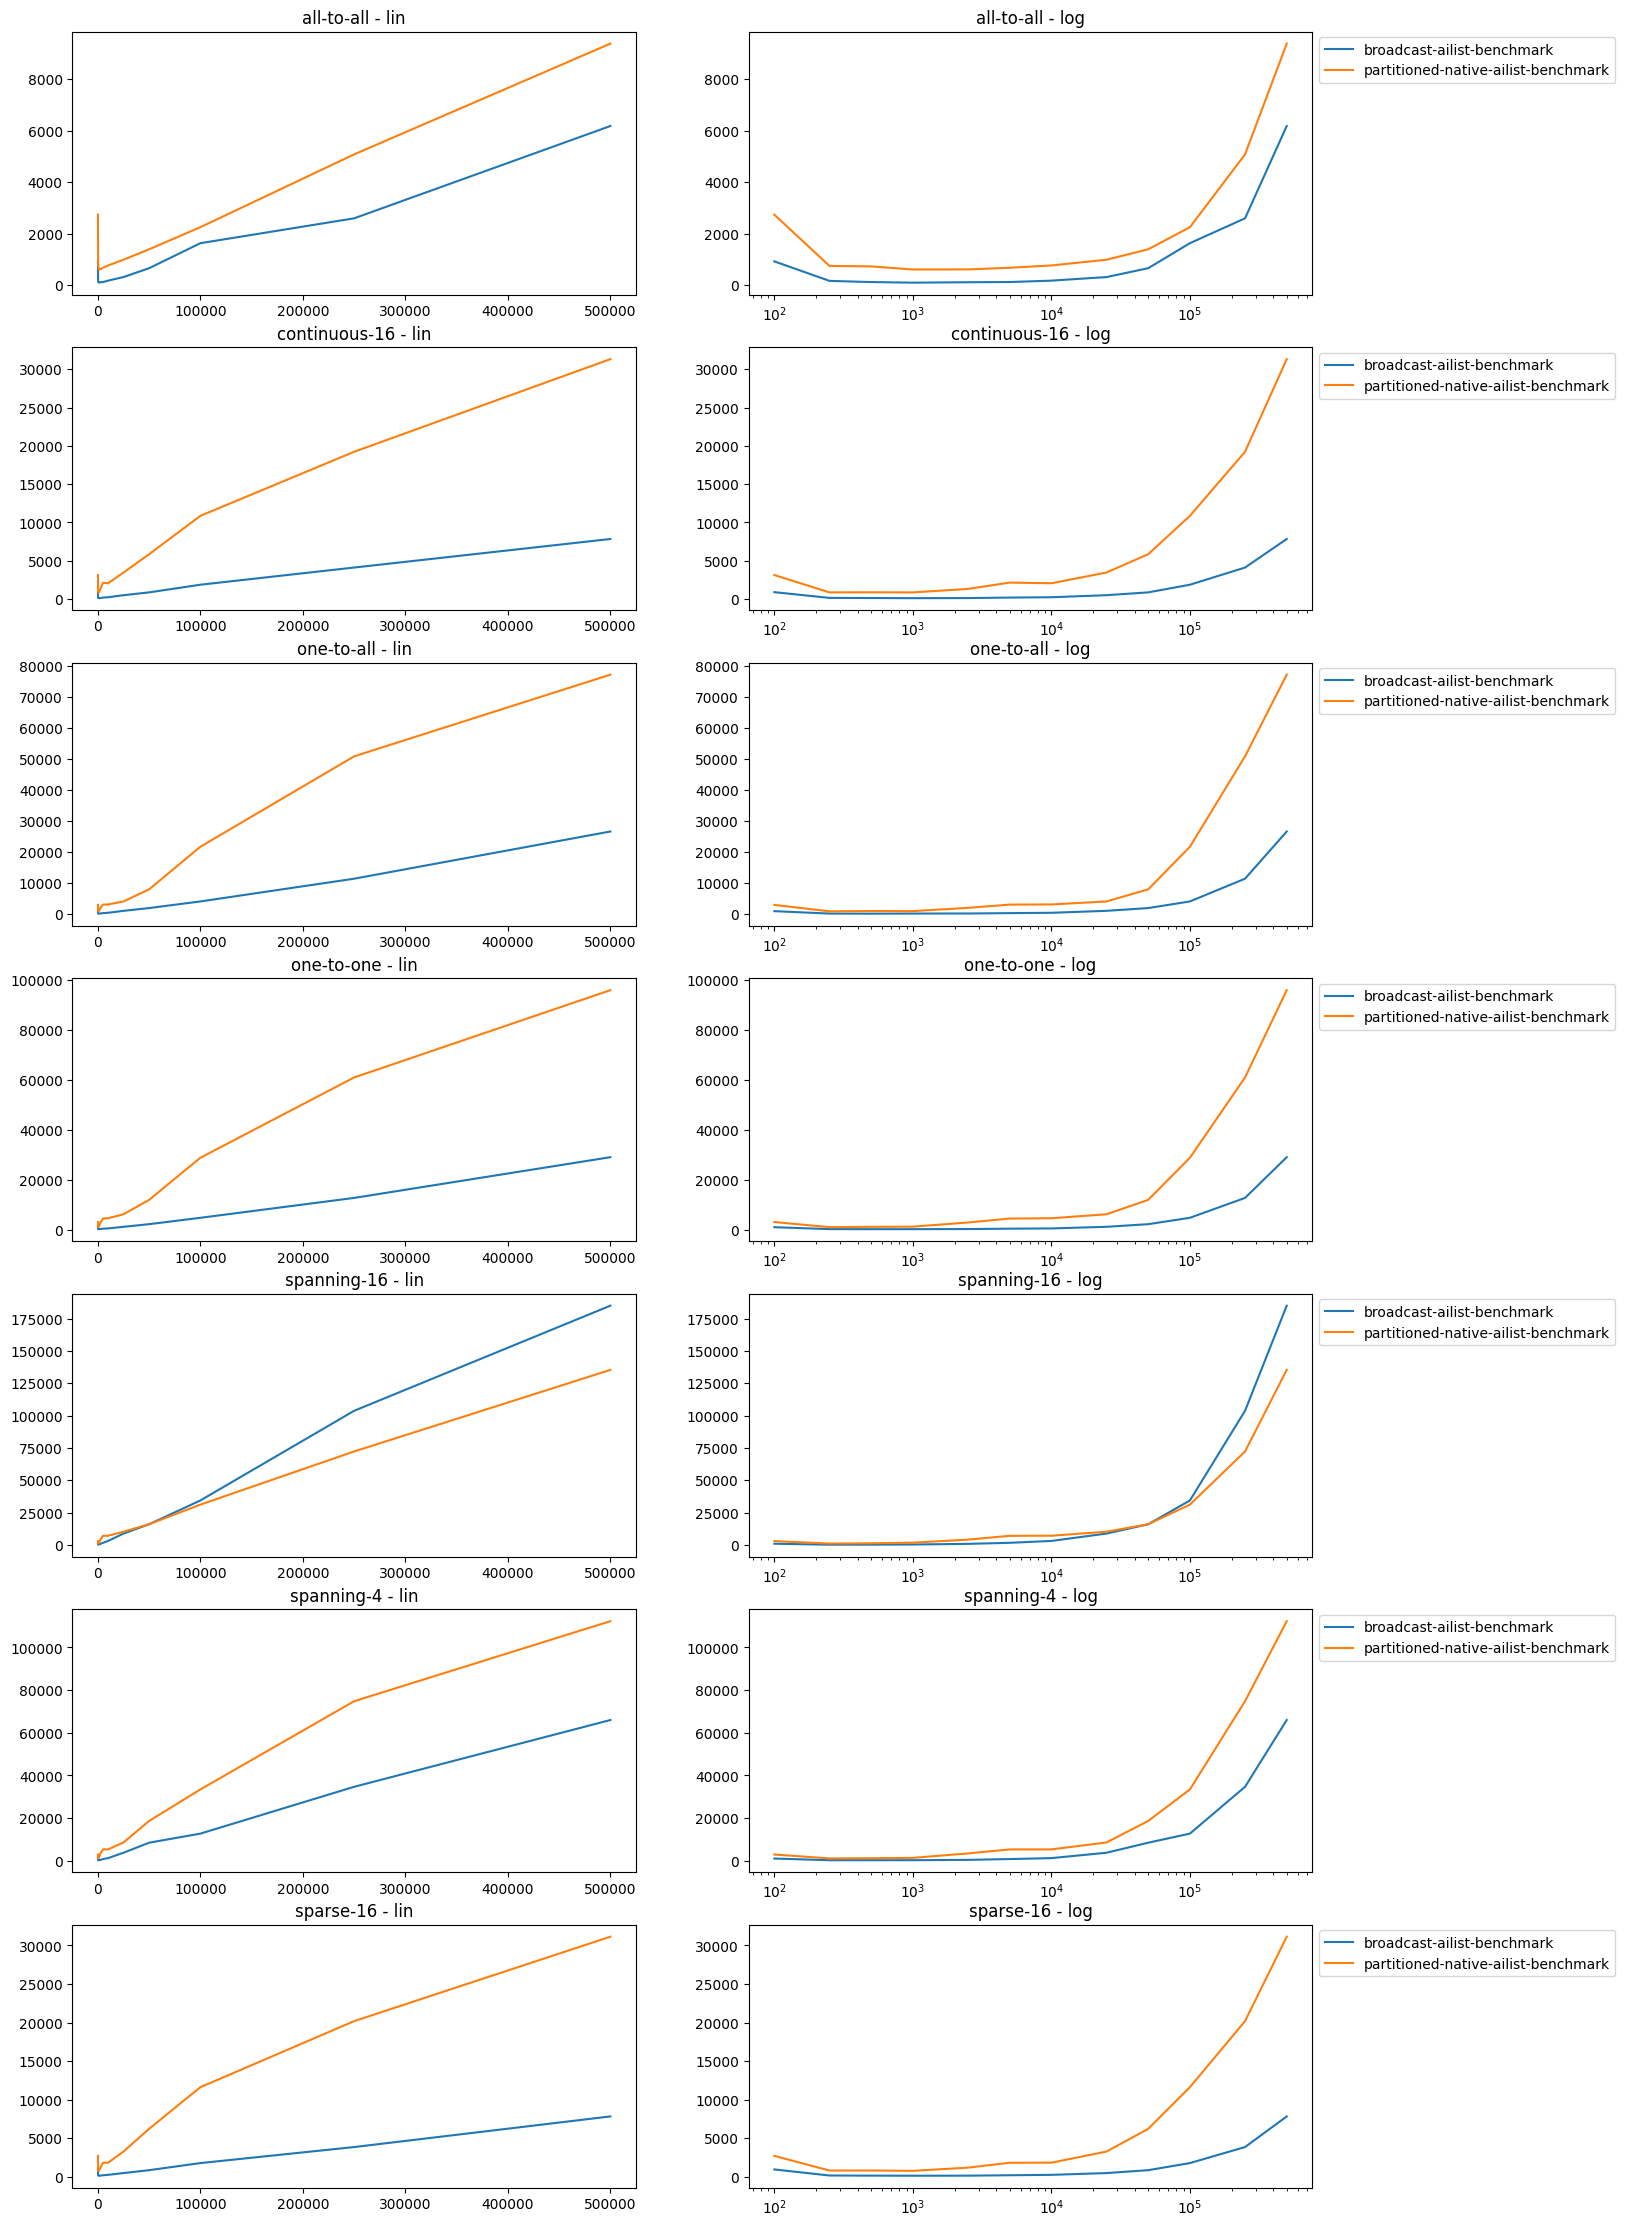

In [62]:
plot_dataset(benchmark_results_df, join_names = [
    "broadcast-ailist-benchmark",
    "partitioned-native-ailist-benchmark"
])

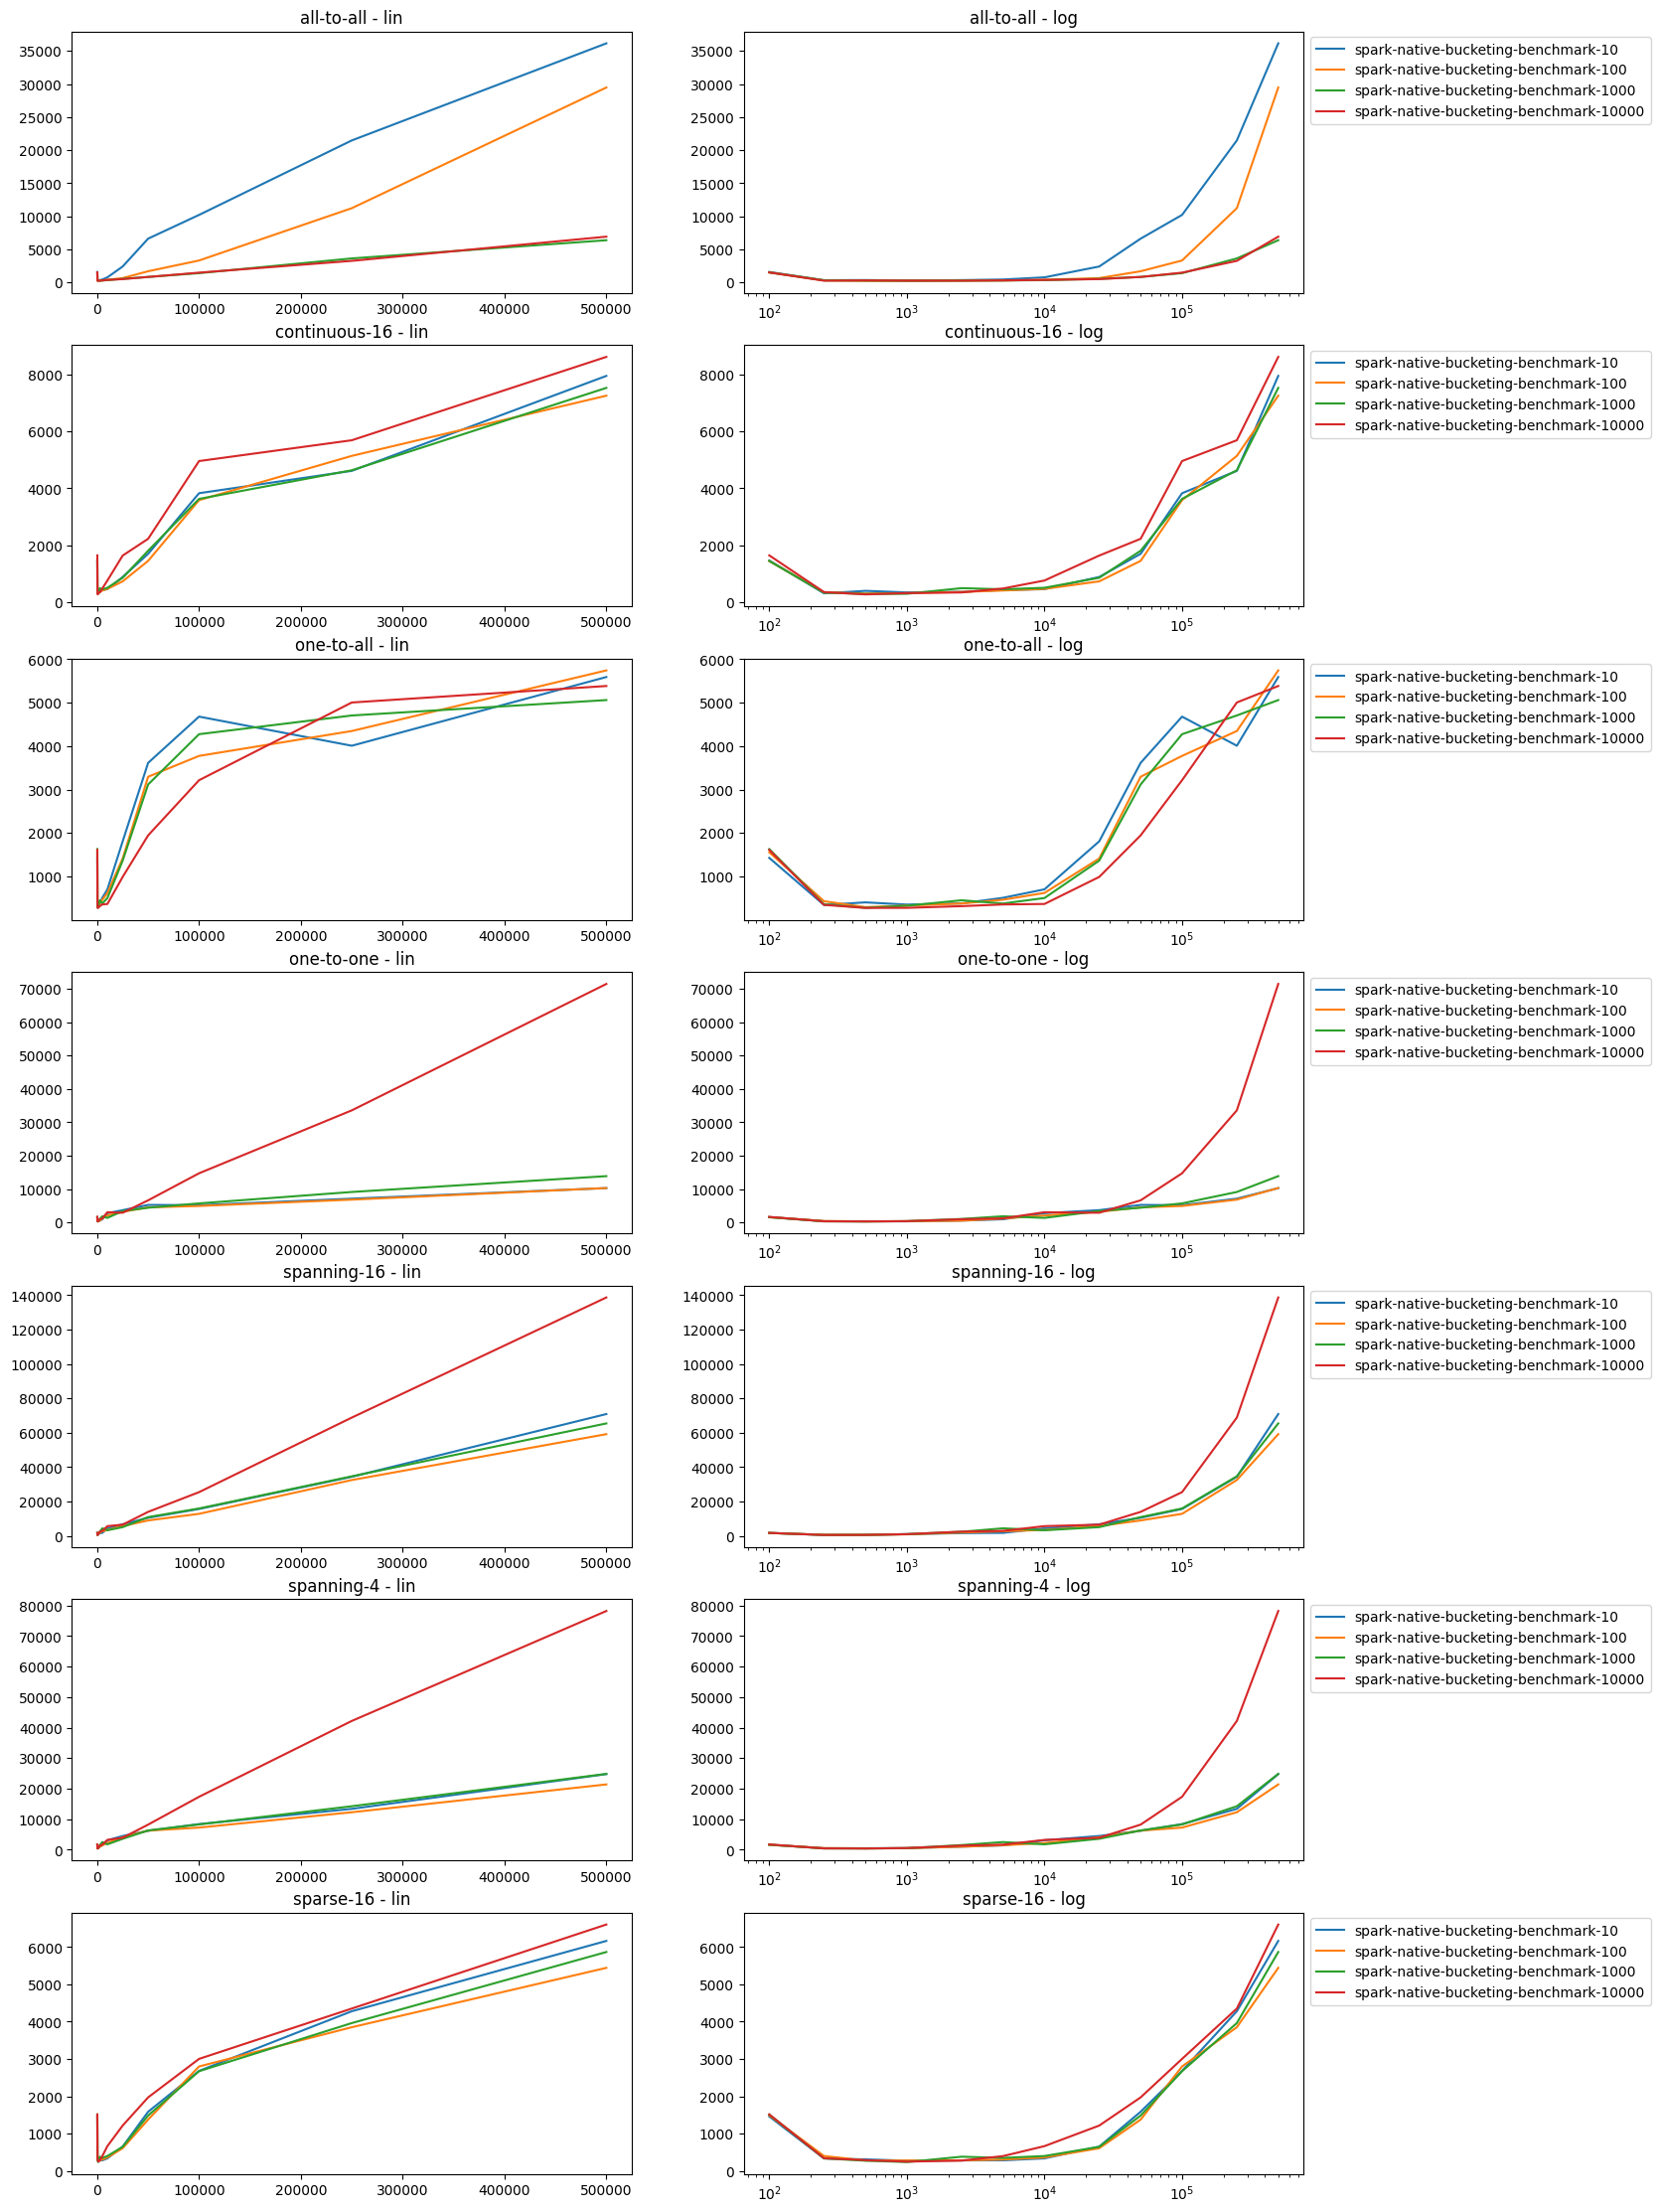

In [63]:
plot_dataset(benchmark_results_df, join_names = [
    "spark-native-bucketing-benchmark-10",
    "spark-native-bucketing-benchmark-100",
    "spark-native-bucketing-benchmark-1000",
    "spark-native-bucketing-benchmark-10000"
])